# KNN Regresion:

In [46]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read Data set

In [47]:
data_set =pd.read_csv("salary data prediction .csv")
data_set.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,24.0,Male,Bachelor's,Sales Representative,3.0,30000.0
1,25.0,Female,Bachelor's,Data Entry Clerk,3.0,35000.0
2,25.0,Male,Bachelor's,Help Desk Analyst,3.0,35000.0
3,26.0,Male,Bachelor's,Junior Accountant,4.0,35000.0
4,26.0,Male,Bachelor's,Junior Software Developer,4.0,35000.0


In [48]:
data_set.shape

(2551, 6)

### Remove Duplicates rows

In [49]:
data_set1=data_set.drop_duplicates()

In [50]:
data_set1.shape

(2547, 6)

In [51]:
data_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2547 entries, 0 to 2550
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2536 non-null   float64
 1   Gender               2534 non-null   object 
 2   Education Level      2533 non-null   object 
 3   Job Title            2534 non-null   object 
 4   Years of Experience  2545 non-null   float64
 5   Salary               2534 non-null   float64
dtypes: float64(3), object(3)
memory usage: 139.3+ KB


In [52]:
data_set1.isnull().sum()

Age                    11
Gender                 13
Education Level        14
Job Title              13
Years of Experience     2
Salary                 13
dtype: int64

### Remove nulls values

In [53]:
data_set1.dropna()
data_set1.fillna(data_set1.mean(), inplace=True)
data_set1.shape

(2547, 6)

## Visualization and Statistics about dataset

In [54]:
data_set1['Job Title'].value_counts()

Director of Marketing             72
Director of Operations            70
Senior Business Analyst           62
Senior Marketing Manager          57
Senior Project Manager            54
                                  ..
Principal Engineer                 6
Director of Sales                  6
Director of Product Management     6
Customer Success Manager           6
Supply Chain Analyst               6
Name: Job Title, Length: 174, dtype: int64

<Axes: >

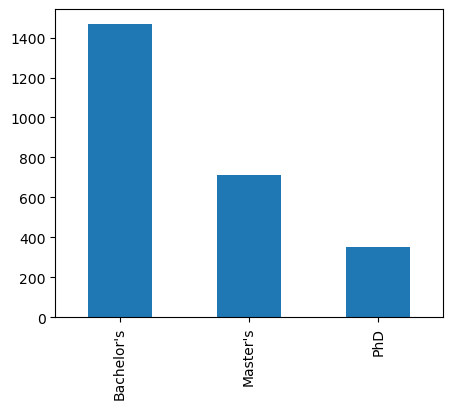

In [55]:
data_set1['Education Level'].value_counts().plot(kind="bar", figsize=(5, 4))


<Axes: >

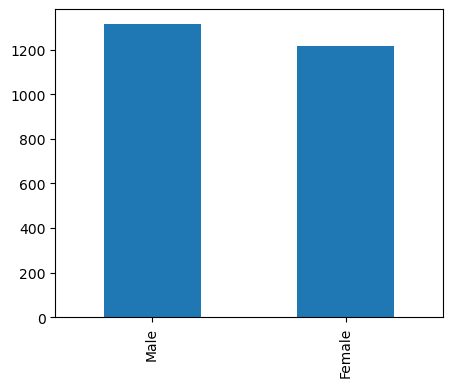

In [34]:
data_set1['Gender'].value_counts().plot(kind="bar", figsize=(5, 4))


<Axes: >

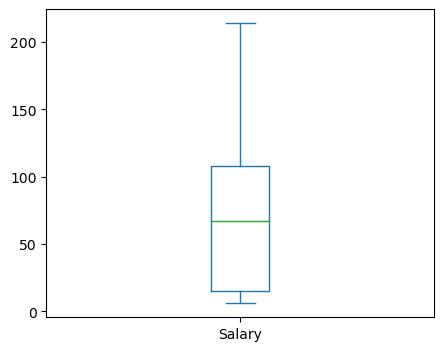

In [35]:
data_set1['Salary'].value_counts().plot(kind="box", figsize=(5, 4))

<Axes: >

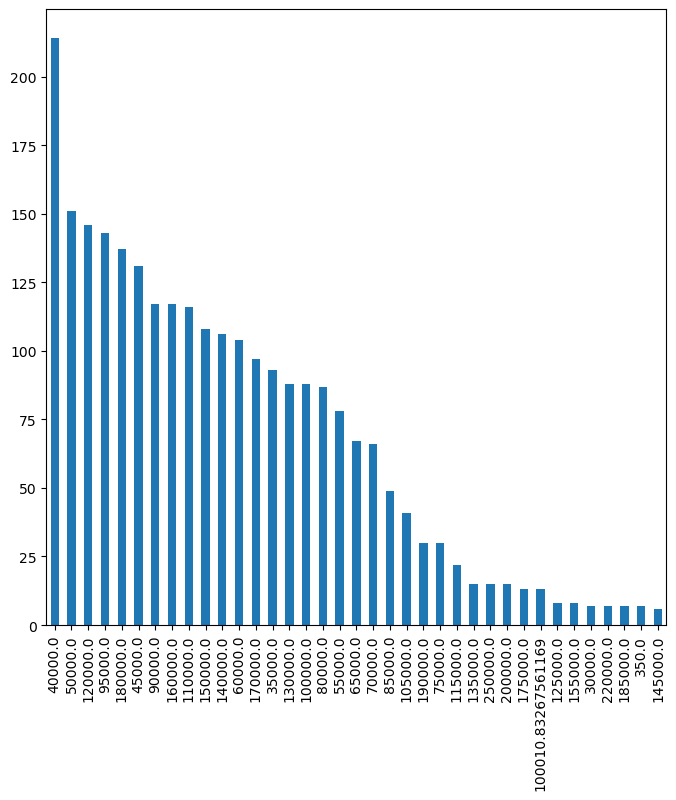

In [36]:
data_set1['Salary'].value_counts().plot(kind="bar", figsize=(8, 8))


In [37]:
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,24.0,Male,Bachelor's,Sales Representative,3.0,30000.0
1,25.0,Female,Bachelor's,Data Entry Clerk,3.0,35000.0
2,25.0,Male,Bachelor's,Help Desk Analyst,3.0,35000.0
3,26.0,Male,Bachelor's,Junior Accountant,4.0,35000.0
4,26.0,Male,Bachelor's,Junior Software Developer,4.0,35000.0


### Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

data_set1["Gender"]=Label_Encoder.fit_transform(data_set1["Gender"])
data_set1["Education Level"]=Label_Encoder.fit_transform(data_set1["Education Level"])
data_set1["Job Title"]=Label_Encoder.fit_transform(data_set1["Job Title"])

data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,24.0,1,0,106,3.0,30000.0
1,25.0,0,0,18,3.0,35000.0
2,25.0,1,0,41,3.0,35000.0
3,26.0,1,0,47,4.0,35000.0
4,26.0,1,0,76,4.0,35000.0


### Normalization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_set1["Age"]=scaler.fit_transform(data_set1[["Age"]])
data_set1["Years of Experience"]=scaler.fit_transform(data_set1[["Years of Experience"]])
data_set1["Job Title"]=scaler.fit_transform(data_set1[["Job Title"]])

data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-1.873208,1,0,0.318214,-1.389361,30000.0
1,-1.733653,0,0,-1.543624,-1.389361,35000.0
2,-1.733653,1,0,-1.057007,-1.389361,35000.0
3,-1.594098,1,0,-0.930064,-1.242882,35000.0
4,-1.594098,1,0,-0.316503,-1.242882,35000.0


In [40]:
X=data_set1[["Age","Gender","Education Level","Job Title","Years of Experience"]]
y=data_set1[["Salary"]]

### Split Dataset

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2, random_state=42)

### KNN Model

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score ,r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=6)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
     

In [43]:
from sklearn.metrics import accuracy_score ,r2_score
print("Best R2 Score is {0:.2f}% :". format( 100*r2))

Best R2 Score is 86.02% :


Text(0.5, 1.0, 'Predicted vs Actual Salary (KNN Regression)')

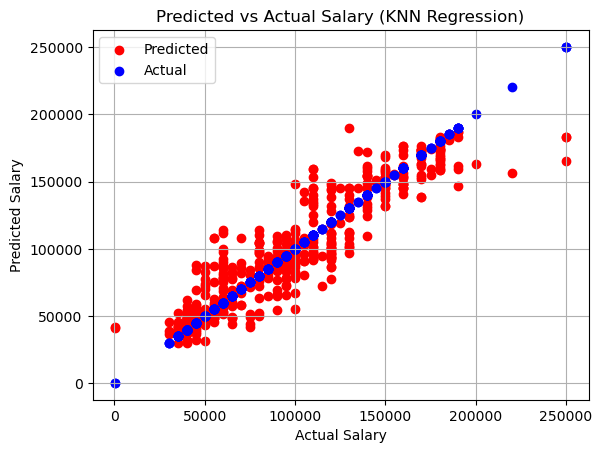

In [44]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='blue', label='Actual')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.grid(True)
plt.legend()
plt.title('Predicted vs Actual Salary (KNN Regression)')
